<a href="https://colab.research.google.com/github/Nithun7023/iris-classifier/blob/main/Iris_Flower_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Precision: 90.00%
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



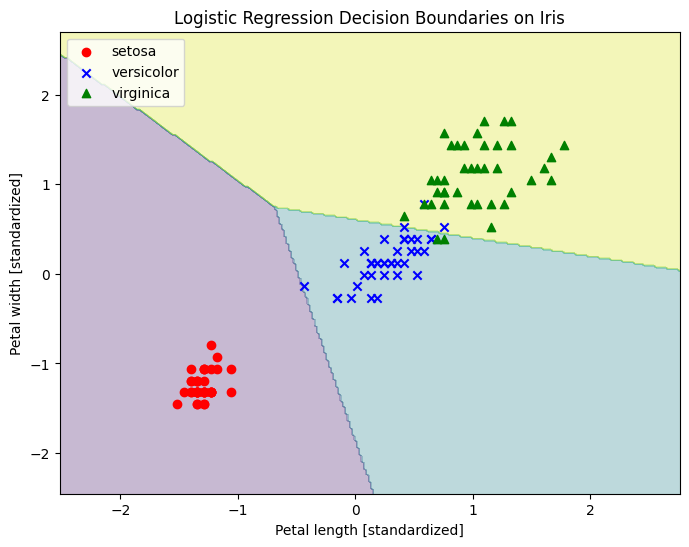

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # using petal length and petal width
y = iris.target

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Train Logistic Regression classifier
lr = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=42)
lr.fit(X_train_std, y_train)

# Predict on test set
y_pred = lr.predict(X_test_std)

# Evaluate precision
precision = precision_score(y_test, y_pred, average='micro')
print(f"Precision: {precision * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Plot decision boundaries
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)

markers = ('o', 'x', '^')
colors = ('red', 'blue', 'green')
labels = iris.target_names
for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(
        X_train_std[y_train == cl, 0],
        X_train_std[y_train == cl, 1],
        c=colors[idx], marker=markers[idx],
        label=labels[idx]
    )

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.title('Logistic Regression Decision Boundaries on Iris')
plt.show()